## Setup

In [1]:
import sys
from packaging import version
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier, plot_tree

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [17]:
df = pd.read_csv('../datas/uci/heart+disease/processed.cleveland.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [18]:
df.columns = [
    'age',
    'sex',
    'cp',
    'restbps',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal',
    'hd'
]
df.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Is there missing data?

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbps  303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


The fact that `ca` and `thal` has `object` datatypes suggest there is something funny going on in them. `Object` datatypes are used when there is mixture of things like numbers and letters

In [20]:
df['ca'].unique(), df['thal'].unique()

(array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object),
 array(['6.0', '3.0', '7.0', '?'], dtype=object))

## Dealing with Missing data

In [21]:
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')]) # count

6

In [22]:
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [23]:
len(df)

303

In [24]:
6 / 303 * 100 # very less missing values

1.9801980198019802

In [25]:
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
df_no_missing

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [26]:
df_no_missing['ca'].unique(), df_no_missing['thal'].unique()

(array(['0.0', '3.0', '2.0', '1.0'], dtype=object),
 array(['6.0', '3.0', '7.0'], dtype=object))

In [27]:
X = df_no_missing.drop('hd',axis=1).copy()
X.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [29]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

## Format the Data: One-Hot Encoding

In [31]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [30]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [32]:
X_encoded = pd.get_dummies(X, columns=['cp','restecg',
                                       'slope', 'thal'])
X_encoded.head()

,age,sex,restbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [33]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

we will just consider yes or no, i.e. has heart disease or do not has heart disease

In [35]:
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

array([0, 1], dtype=int64)

## Build a Preliminary Classification Tree

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,random_state=42)

## Create a decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

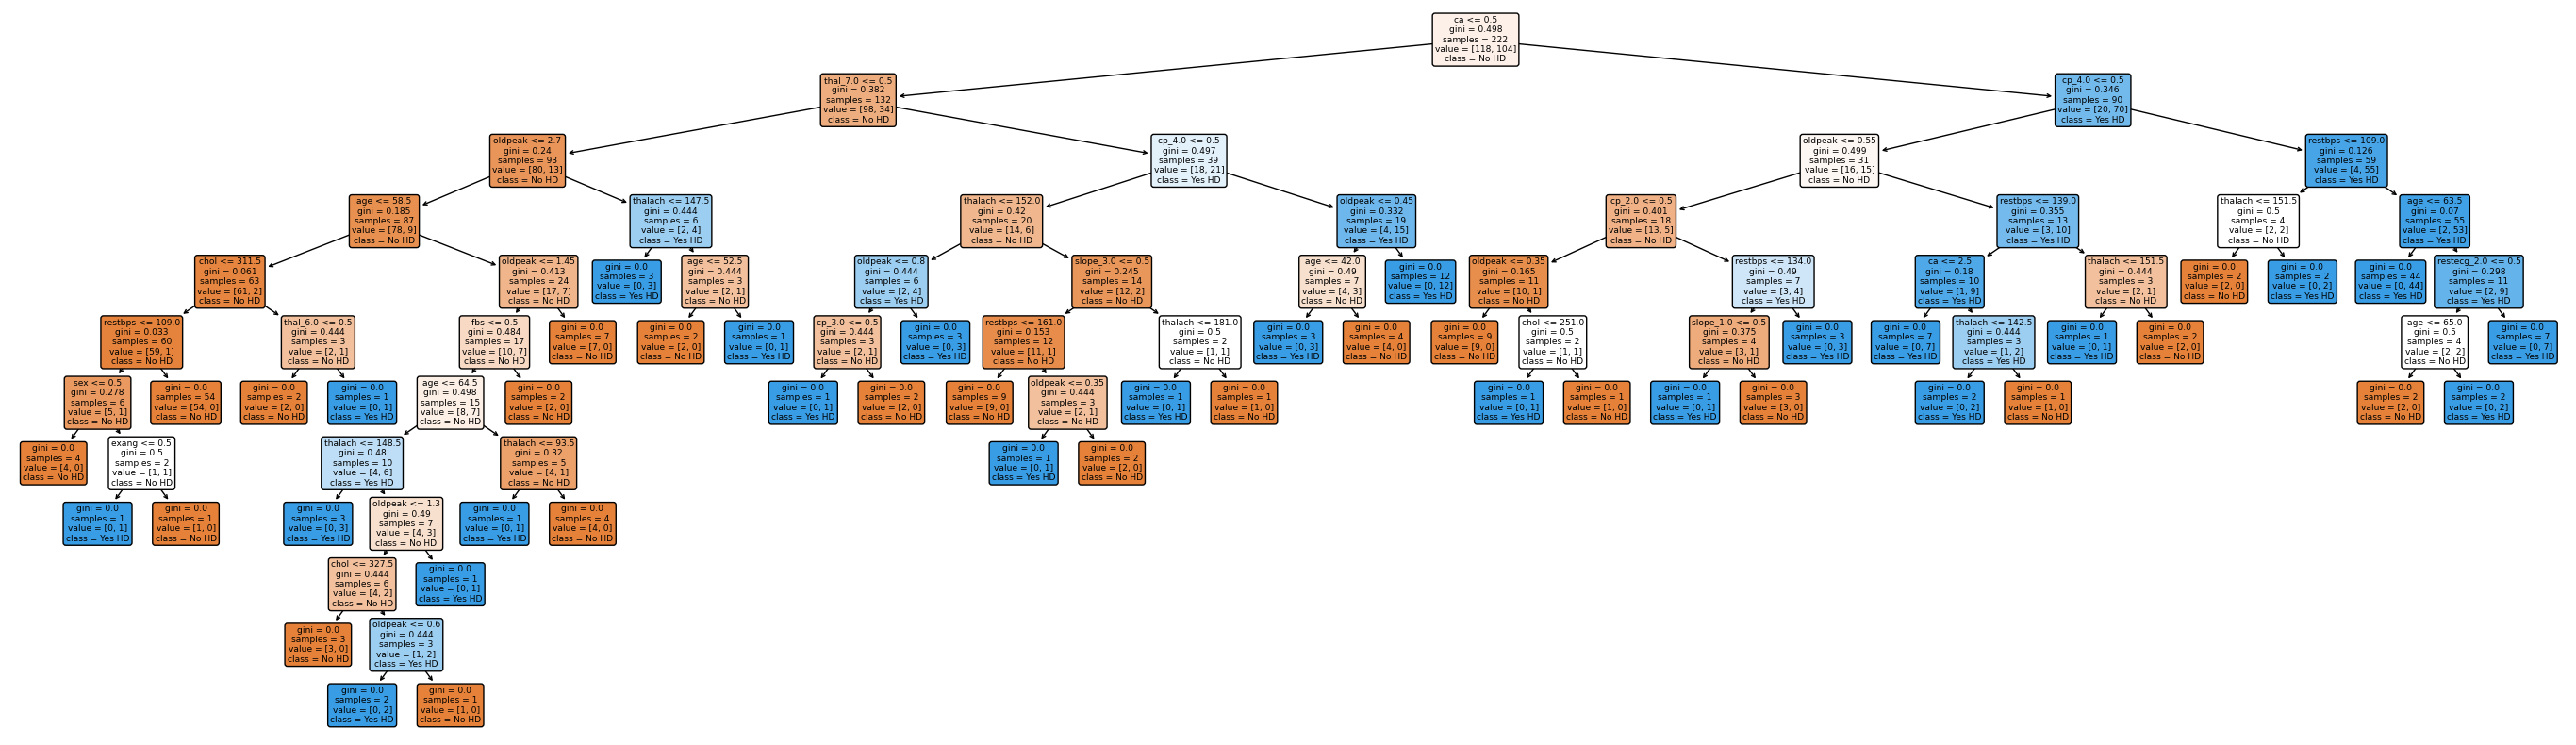

In [42]:
plt.figure(figsize=(35,10))
plot_tree(clf_dt,filled=True,rounded=True,class_names=['No HD', 'Yes HD'],
          feature_names=X_encoded.columns)
plt.show()

c:\Users\Asus\.conda\envs\dataScience\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


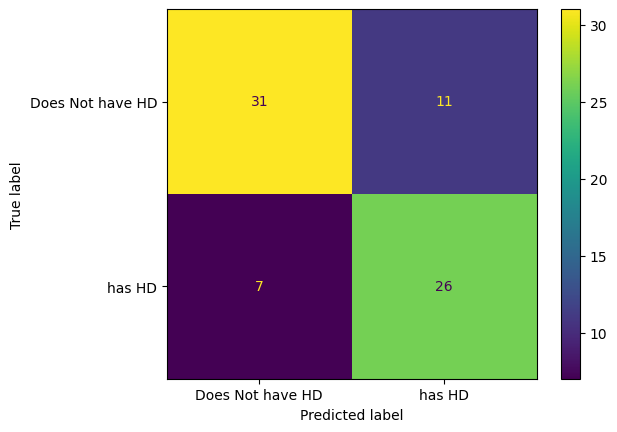

In [43]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['Does Not have HD', 'has HD'])

In [47]:
31/42*100, 26/33*100

(73.80952380952381, 78.78787878787878)

#### This can be overfitting

## Cost Complexity Pruning Part 1: Visualize Alpha

First, lets extract all the different values of alpha that are available for this tree and build a prune tree for each value of `alpha`.

**NOTE**: We omit last (max) val of alpha because it will prune all leaf leaving us with root node only

In [48]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values of alpha
ccp_alphas = path.ccp_alphas # extract different values of alpha
ccp_alphas = ccp_alphas[:-1] #exclude last alpha

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

##### Now lets graph the accuracy of the trees using the Training Dataset, and the testing Dataset as a func of alpha

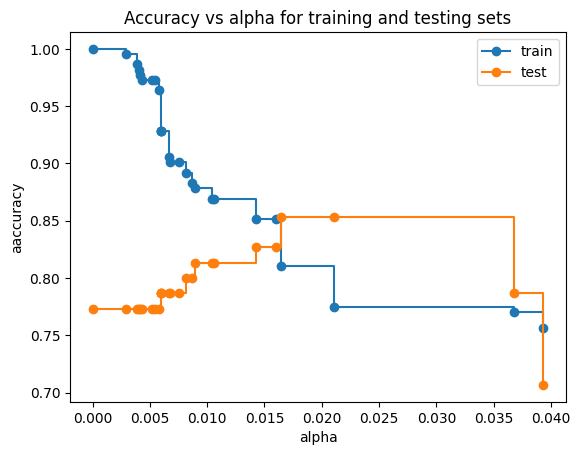

In [49]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig,ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('aaccuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle="steps-post")
ax.legend()
plt.show()

when alpha = 0.016 accuracy for Testing dataset is max. After this value of alpha accuracy of Training dataset drops off suggesting setting ccp_alpha = 0.016

but this approach is not optimal, so we use cross validation

## Cost Complexity Pruning Part 2: Cross Validation for finding the Best Alpha

<AxesSubplot:xlabel='tree'>

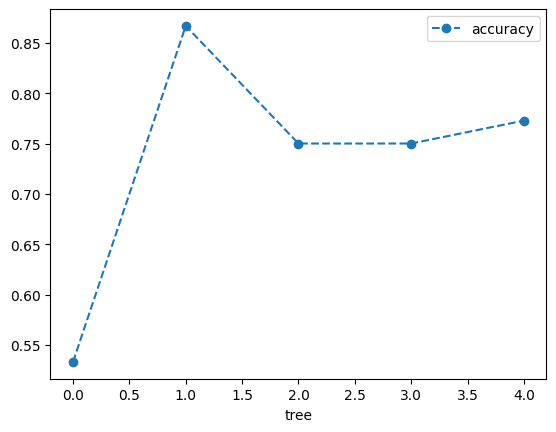

In [50]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data = {'tree': range(5), 'accuracy': scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

The graph above shows that using different `Training` and `Testing` data with same `alpha` resulted in different accuracies, suggesting that alpha is sensitive to the datasets. So, instead of picking up a single `Training` dataset and single `Testing` dataset, let's use `cross validation` to find the optimal value for `ccp_alpha`

<AxesSubplot:xlabel='alpha'>

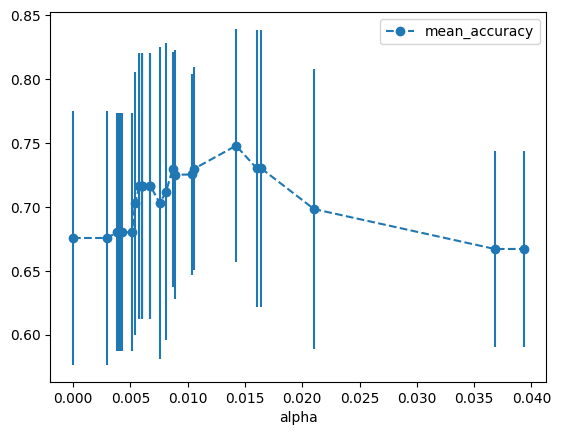

In [51]:
## create an array to store the results of each fold during cross validation
alpha_loop_values = []

"""
For each candidate val of alpha, we will run 5-fold cross validation
Then we will store the mean and standard deviation of the scores (the accuracy),
for each call to cross_val_score in alpha_loop_values...
"""
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o',linestyle='--')

In [52]:
alpha_results[(alpha_results['alpha'] > 0.014)
              &
              (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [56]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014)
              &
              (alpha_results['alpha'] < 0.015)]['alpha'].item()

ideal_ccp_alpha

0.014224751066856332

## Building, Evaluating, Drawing and Interpreting the Final Classification Tree

In [57]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

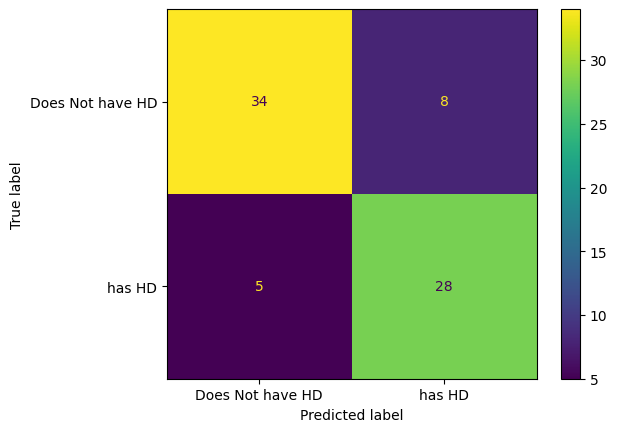

In [59]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=['Does Not have HD', 'has HD'])

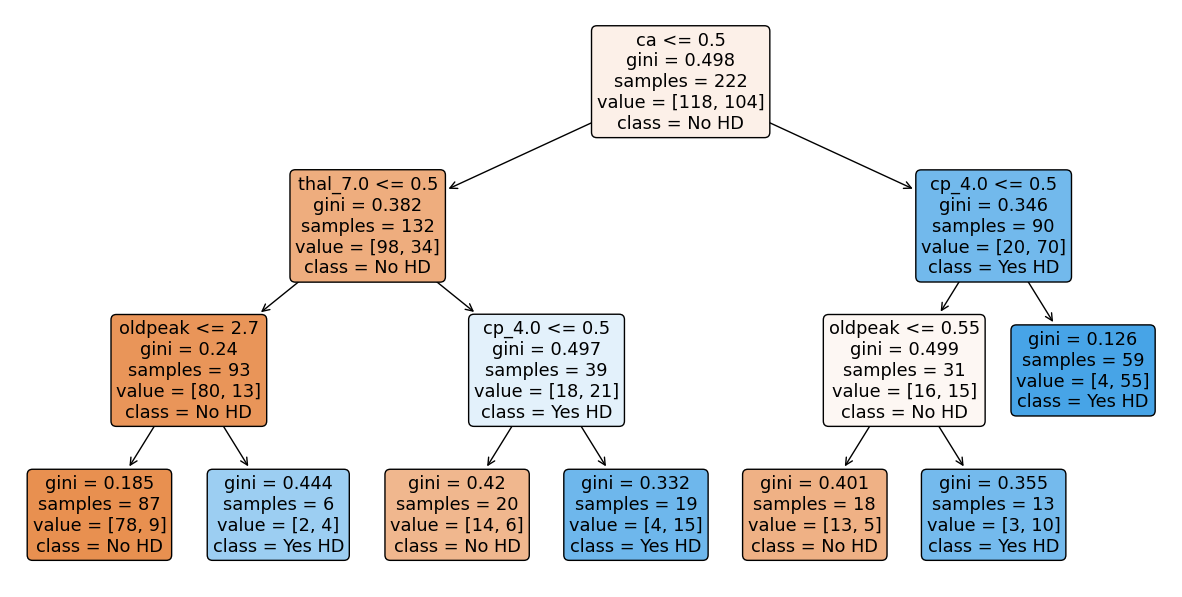

In [62]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=['No HD', 'Yes HD'],
          feature_names=X_encoded.columns)
plt.show()